## Pre Step 
1. The topic i would like to explore in this project is Machine Learning in health sector. Through this analysis, I will try to find the answer to how average Body Mass Index (BMI) of the total population of a country affects the life expectancy of that country and what is the range of BMI score that gives higher life expectancy. 

## Data
2. I have chosen to use the Life Expectancy Dataset from WHO for the analysis. I found the dataset on Kaggle, which is a very popular and resourceful data science community. I searched for Datasets to perform Linear Regeression analysis and found this dataset. The two variables that are relavant to my analysis are Life Expectancy of a county in years and the average BMI of the country as i am trying to find out how it impacts the life expectancy. The unit of observation is a 'Country' since the observations in this dataset are based on different countries.
##### -
3. One change I would have made to this dataset to imporove my analysis, would be to add some score or scale to analyse the average eating habits, lifestyle and exercise as they greatly affect the BMI of a person. I would have included this scale to find out if it has a positive or negative correlation with the Life Expectancy and also with the BMI. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 4. Importing the dataset using pd.read_csv method. No pre-work required to upload
df = pd.read_csv('Life Expectancy Data.csv')

In [52]:
#First 5 obsevations of data
print(df.head(5))

      Country  Year      Status  Life Expectancy  Adult Mortality  \
1916   Norway  2009   Developed             89.0             67.0   
915   Finland  2014  Developing             89.0             78.0   
241   Belgium  2014   Developed             89.0             76.0   
2513   Sweden  2007   Developed             89.0             63.0   
938    France  2007  Developing             89.0             89.0   

      infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   \
1916              0     6.68              142.374943          NaN         2   
915               0     8.80             6164.455402          NaN         0   
241               0    12.60             7163.348923         98.0        70   
2513              0     6.90             7593.391622          NaN         1   
938               3    12.20               64.737149         42.0        39   

       BMI  under-five deaths   Polio  Total expenditure  Diphtheria   \
1916  58.5                   0   94.0

## Initial Analysis
5. I renamed the target columns Life expectancy and BMI to remove extra white spaces which makes it easier to work with the variables
##### -
I checked for missing values in the two variables in focus, and dropped the rows containing missing values. Missing values in the dataset can cause problems later during the analysis, so it is better to get rid of them at an inital stage. I learned that there were 10 and 34 missing observations in the columns 'Life Expectancy' 'BMI' respectively which had to be dropped.
##### - 
I sorted values of Life Expectancy in descending order to analyse initially the trend of BMI values for high life expectancy. I learned, the initial trend shows that for a high life expectancy in range of 85 - 90 has corresponding average BMI values in the range of 55 - 65 which means the average population of countries with high values of life expectancy is obese.

In [4]:
#Displaying column names to rename in next step
df.columns[3], df.columns[10]

('Life expectancy ', ' BMI ')

In [5]:
#Renaming the two target variables
df.rename(columns = {'Life expectancy ':'Life Expectancy'}, inplace = True)
df.rename(columns = {' BMI ':'BMI'}, inplace = True)

In [6]:
#Check for total missing values in each column
df.isna().sum()

Country                              0
Year                                 0
Status                               0
Life Expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [7]:
#Dropping the rows with missing values in the two columns
df = df.dropna(subset=['Life Expectancy', 'BMI'])

In [8]:
#Sorting values of Life Expectancy in descending order
df.sort_values("Life Expectancy", axis = 0, ascending = False, inplace = True)

In [9]:
#This line sets the dataframe to display all columns if we view it
pd.set_option('display.max_columns', None)

In [53]:
#Displaying the dataset to get an initial idea 
print(df.head(50))

                                                Country  Year      Status  \
1916                                             Norway  2009   Developed   
915                                             Finland  2014  Developing   
241                                             Belgium  2014   Developed   
2513                                             Sweden  2007   Developed   
938                                              France  2007  Developing   
1850                                        New Zealand  2010   Developed   
2056                                           Portugal  2014   Developed   
937                                              France  2008  Developing   
1293                                              Italy  2004   Developed   
2433                                              Spain  2007   Developed   
995                                             Germany  2014   Developed   
1181                                            Iceland  2004   Developed   

##### -
6. The first graph i chose to plot is the scatter plot between values of Life expectancy and BMI. I hoped to understand how life expectancy chenages on increasing BMI. This plot shows us that a high life expectancy between 70 - 80 years is achieved by countries having a high BMI between 50 and 60. It helps me in forming the null and alternate hyphothesis. Hence, it does improve my understanding of the analysis. 
##### -
For the second graph, I used sns.heatmap() to plot a correlation matrix of all of the variables in the used Life Expectancy  dataset. Correlation is a measurement that describes the relationship between two variables. This helps us to know how BMI is correlated to Life expectancy. Also, it shows us on many variables is Life Expectancy strongly dependent along with BMI. We can see that BMI has a high positive correlation with Life expectancy impying that there is a strong relationship between the two variables. The other factors which have also have a high correlation with Life expectancy are Schooling, GDP and Income composition of resources.

In [11]:
#Getting values of columns to plot later
life_expectancy = df.iloc[:,3]
bmi = df.iloc[:,10]

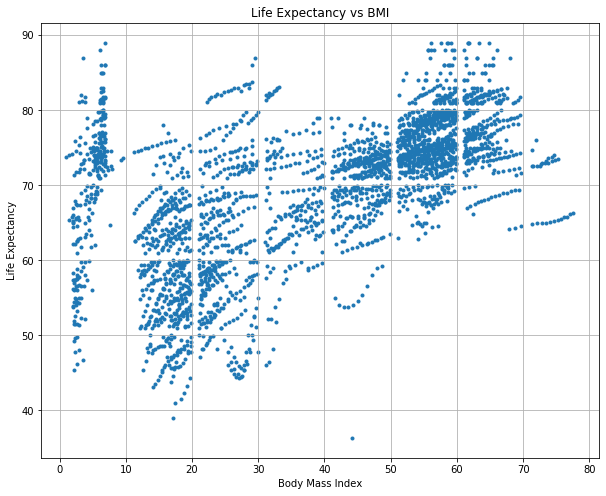

In [48]:
#Plotting the scatterplot
fig=plt.figure(figsize=(10,8))
plt.scatter(bmi, life_expectancy,cmap='seaborn',marker='.')
plt.xlabel('Body Mass Index')
plt.ylabel('Life Expectancy')
plt.title('Life Expectancy vs BMI')
plt.grid()
plt.show()

In [13]:
#Importing seaborn
import seaborn as sns

In [14]:
#Generating the correlation matrix
corrmat = df.corr() 

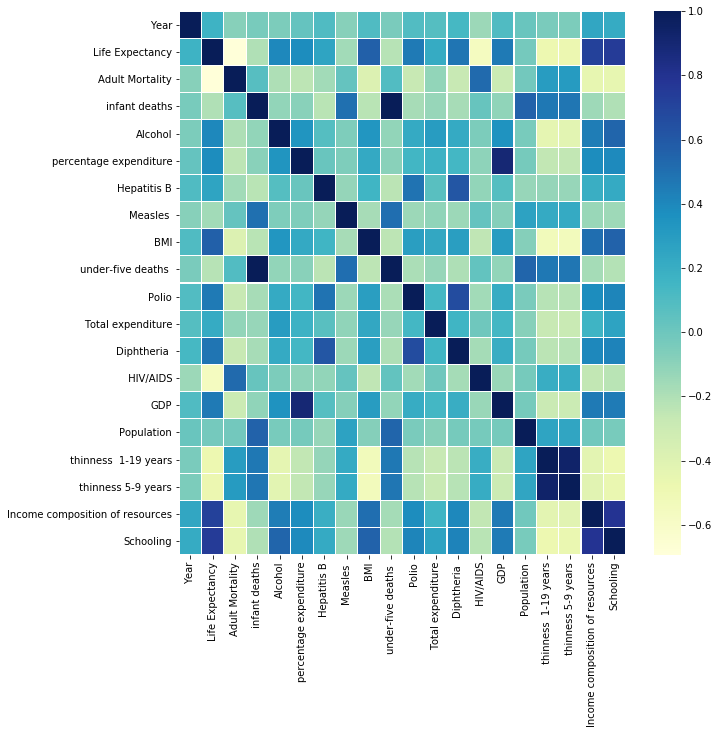

In [15]:
#Plotting the correlation matrix
f, ax = plt.subplots(figsize =(10, 10)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1) 
plt.show()

## Hypothesis formation
7. The dependent variable in this dataset is 'Life Expectancy'. It is the average life expectancy of the population of a country calculated every year. It is a dependant variable as it depends on various factors like education, healthcare, GDP etc. of a country. It is measured in age or years. The independant variable that I have chosen is 'BMI' or Body Mass Index. It is the average BMI value of total population of a country in a year. It is calculated using the formula, BMI = kg/m2 where kg is a person's weight in kilograms and m2 is their height in metres squared.
##### -
8. Correlation Coefficient

In [16]:
print("Correlation coefficient: ",df['Life Expectancy'].corr(df['BMI']))

Correlation coefficient:  0.5676935475459861


The correlation coefficient is 0.567 which indicates that these two variables can be considered moderately correlated
##### -
9. Regression model equation
###### h(Xi) = b0 + (b1).Xi 
##### where h(Xi) represents the predicted response value for ith observation.
##### b0 and b1 are regression coefficients and represent y-intercept and slope of regression line respectively.

In [17]:
#Function to find out regression equation 
def estimate_coef(x, y): 
    # number of observations/points 
    n = np.size(x) 
  
    # mean of x and y vector 
    m_x, m_y = np.mean(x), np.mean(y) 
  
    # calculating cross-deviation and deviation about x 
    SS_xy = np.sum(y*x) - n*m_y*m_x 
    SS_xx = np.sum(x*x) - n*m_x*m_x 
  
    # calculating regression coefficients 
    b_1 = SS_xy / SS_xx 
    b_0 = m_y - b_1*m_x 
  
    return(b_0, b_1) 

In [18]:
b = estimate_coef(bmi, life_expectancy) 

In [19]:
print("The regression model equation for the selected variables is h(Xi) = {:.3f} + ({:.3f}) Xi ".format(b[0], b[1]))

The regression model equation for the selected variables is h(Xi) = 59.032 + (0.270) Xi 


## Regression Analysis

#### 10. Null hypothesis
BMI values ranging from 40 - 70 achieve higher mean life expectancy than mean life expectancy from all BMI values 
#### Alternative hypothesis
BMI values ranging from 40 - 70 does not achieve higher mean life expectancy than from all BMI values

In [49]:
#Function to plot the regression line
def plot_regression_line(x, y, b): 
    # plotting the actual points as scatter plot
    plt.figure(figsize=(10,8))
    plt.scatter(x, y, color = "y", marker = ".", s = 20) 
  
    # predicted response vector 
    y_pred = b[0] + b[1]*x 
  
    # plotting the regression line 
    plt.plot(x, y_pred, color = "b", lw=1) 
  
    # putting labels 
    plt.xlabel('BMI') 
    plt.ylabel('Life Expectancy')
    plt.title("11. Regression Line")
    plt.show()

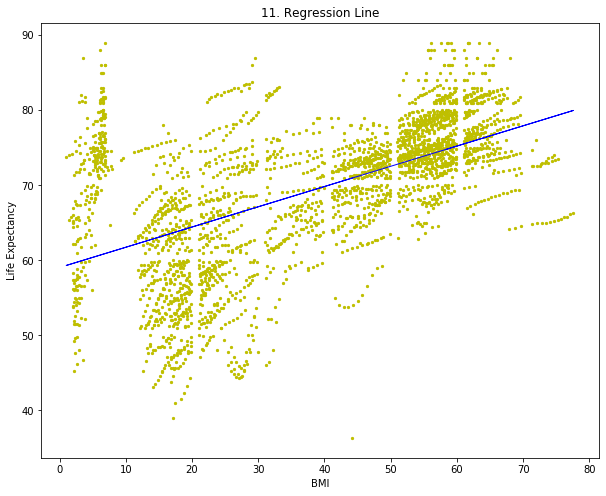

In [50]:
#Plot the regression line
plot_regression_line(bmi, life_expectancy, b)

12. The regression output tells us that there is a linear positive relationship between Life expectancy and BMI

In [22]:
#Creating new dataframe where BMI values range between 40 to 70 to test our hypothesis
new_df =  df[(df['BMI']>=40) & (df['BMI']<70)]

In [54]:
print(new_df)

           Country  Year      Status  Life Expectancy  Adult Mortality  \
1916        Norway  2009   Developed             89.0             67.0   
915        Finland  2014  Developing             89.0             78.0   
241        Belgium  2014   Developed             89.0             76.0   
2513        Sweden  2007   Developed             89.0             63.0   
938         France  2007  Developing             89.0             89.0   
...            ...   ...         ...              ...              ...   
2405  South Africa  2003  Developing             54.0            485.0   
2402  South Africa  2006  Developing             54.0            496.0   
2403  South Africa  2005  Developing             53.8            498.0   
2404  South Africa  2004  Developing             53.7            497.0   
1127         Haiti  2010  Developing             36.3            682.0   

      infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   \
1916              0     6.68    

In [24]:
#For random sampling
import random

In [25]:
#Extractive values from the dataframe in a list to perform samplin
life_expectancy_sampling = new_df['Life Expectancy']
life_expectancy_sampling = life_expectancy_sampling.tolist()

In [35]:
#Calculating the mean life expectancy achieved from all BMI values.
mean_life_expectancy = np.mean(life_expectancy)
print("The mean life expectancy achieved from all BMI values ", mean_life_expectancy)

The mean life expectancy achieved from all BMI values  69.35062154696132


In [38]:
#Calculating p-value and confidence interval for our hypothesis
count = 0
for i in range(50):
    sampled_list = random.sample(life_expectancy_sampling, 200)
    sample_mean_life_expectancy = np.sum(sampled_list)/200
    if sample_mean_life_expectancy < mean_life_expectancy:
        count += 1
p_value = count / 50
cf = (1-p_value)*100

In [39]:
print("The p-value for our null hypothesis is: {}. Hence, our confidence interval is {}% ".format(p_value,cf))

The p-value for our null hypothesis is: 0.0. Hence, our confidence interval is 100.0% 


#### Interpreting the p-value and confidence interval
I calculated the p-value and confidence interval for my null hypothesis which says that BMI values ranging from 40 - 70 achieve higher mean life expectancy than mean life expectancy from all BMI values. I took a sample of mean life expectancy when BMI values range from 40 to 70, of size 200, fifty times and calculated the probabilty of the mean being greater than the mean life expectancy of the whole dataset. The p-value came out to be 0.0 and the confidence interval 100%. This means that our hypothesis is statistically significant.

In [29]:
import statsmodels.api as sm

In [30]:
#Performing OLS regression analysis of our two continuous variables
model = sm.OLS(life_expectancy,bmi)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        Life Expectancy   R-squared (uncentered):                   0.835
Model:                            OLS   Adj. R-squared (uncentered):              0.835
Method:                 Least Squares   F-statistic:                          1.468e+04
Date:                Sat, 02 May 2020   Prob (F-statistic):                        0.00
Time:                        12:54:54   Log-Likelihood:                         -13801.
No. Observations:                2896   AIC:                                  2.760e+04
Df Residuals:                    2895   BIC:                                  2.761e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
BMI            1.4832      0.012    121.161      0.000       1.459       1.507
==============================================================================
Omnibus:                      175.871   Durbin-Watson:                   1.462
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              173.096
Skew:                           0.550   Prob(JB):                     2.59e-38
Kurtosis:                       2.527   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Interpreting the coefficent and the R2 using OLS Regression Results
The coefficient represents the mean increase of BMI for every additional one year in Life expectancy. If the Life expectancy increases by 1 year, the average BMI increases by 1.4832. This again, represents a positive relationship. The value of R-sqaured is 0.835 or 83.5%. This implies that our regression model fits the observations well. 

13. I fail to reject the null hypothesis as the calculated p-values and confidence interval show that our hypothesis is statistically significant. Hence, the assumption that BMI values ranging from 40 - 70 achieve higher mean life expectancy than mean life expectancy from all BMI values is true. Thus, the alternative hypothesis gets rejected.

In [31]:
#Converting the values to numpy arrays to generate residual plot later
bmi = np.array(bmi)
life_expectancy = np.array(life_expectancy)

In [32]:
#Reshaping the arrays
bmi = bmi.reshape(-1, 1)
life_expectancy = life_expectancy.reshape(-1, 1)

In [33]:
#Importing LinearRegression model from sci-kit
from sklearn.linear_model import LinearRegression
#run regression
reg = LinearRegression().fit(bmi, life_expectancy)

#### 14. Residual Plot
The residual plot is homoskedastic as the residuals plot is the same width for all values of the predicted life expectancy. The following residuals plot shows data that is fairly homoscedastic. In fact, this residuals plot shows data that meet the assumptions of homoscedasticity, linearity, and normality (because the residual plot is rectangular, with a concentration of points along the center).

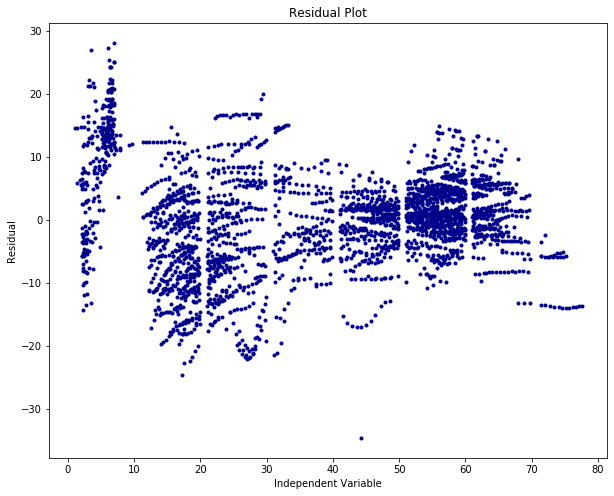

In [45]:
#Generated Predictions
y_predicted = reg.predict(bmi)

#Generating Residual plot
residuals = life_expectancy-y_predicted
plt.figure(figsize=(10,8))
plt.plot(bmi,residuals, '.', color='darkblue')
plt.title("Residual Plot")
plt.xlabel("Independent Variable")
plt.ylabel("Residual")
plt.show()

## Conclusions
15. During the survey sampling of this dataset, the following biases could be present
a. Undercoverage: Undercoverage occurs when some members of the population are inadequately represented in the sample. It is possible that in many countries, the BMI may not have been calcualted for a specific group of the entire population like the poor.
b. Voluntary response bias: Voluntary response bias occurs when sample members are self-selected volunteers, as in voluntary samples. In many countries, the survey sampling could have been voluntary, which can introduce a voluntary response bias in the sample
##### -
16. From the regression output and hypothesis testing results we can conclude that having a high average BMI of the population of a country does indeed achieve a higher life expectancy for the country. As the average BMI value of a country goes up, it's life expectancy also increases. The countries should hence focus on the health of the people addresing malnutrition problems in the poor, and ensuring there is enough food for everyone. This would decrease the probability of a life threatening disease at a later stage in a person's life and the life expectancy would thus increase. 
#### - 
17. The greatest weakness of this analysis is that even though it tells us to increase the average BMI of a country to increase it's life expectancy, it does not factor into account that a person with a BMI value of over 30 is considered as obese and who has higher risk of developing aditional health problems due to obesity.